# Business Objective: Creating clusters on global development measurement dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
global_data = pd.read_excel(r"D:\Proj Clustering\World_development_mesurement (1) (1).xlsx")
#importing data and making a copy
data = global_data.copy()

In [3]:
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

Data Set Details:
The dataset is having information about important economic and development metrics related to various countries across the globe. 


# EDA

In [5]:
data.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [6]:
#we have std '0' with "Number of Records" so we can remove that variable
data = data.drop('Number of Records', axis = 1)

In [7]:
# Business Tax Rate,GDP,Health Exp/Capita,Tourism Inbound,Tourism Outbound etc., all these are either int or float
#But these are shown as Object data type due to '$','%',','
#For handling these we need to create a String to Float

In [8]:
#Craeting a String to Float function
def string_to_float(x):
    if isinstance(x, (float, int)):
        return float(x)  # convert integer or float to float
    try:
        x = str(x).replace('$', '').replace(',', '').replace('%', '')
        return float(x)
    except ValueError:
        return None

In [9]:
#Dropping 'Country' it is an object & applying String to Float
#Using applymap function to each and every element in data.
df = data.drop("Country", axis = 1)
df = df.applymap(string_to_float)

In [10]:
df['Country']=data['Country']

In [11]:
print("No.of duplicates :",df.duplicated().sum())

No.of duplicates : 0


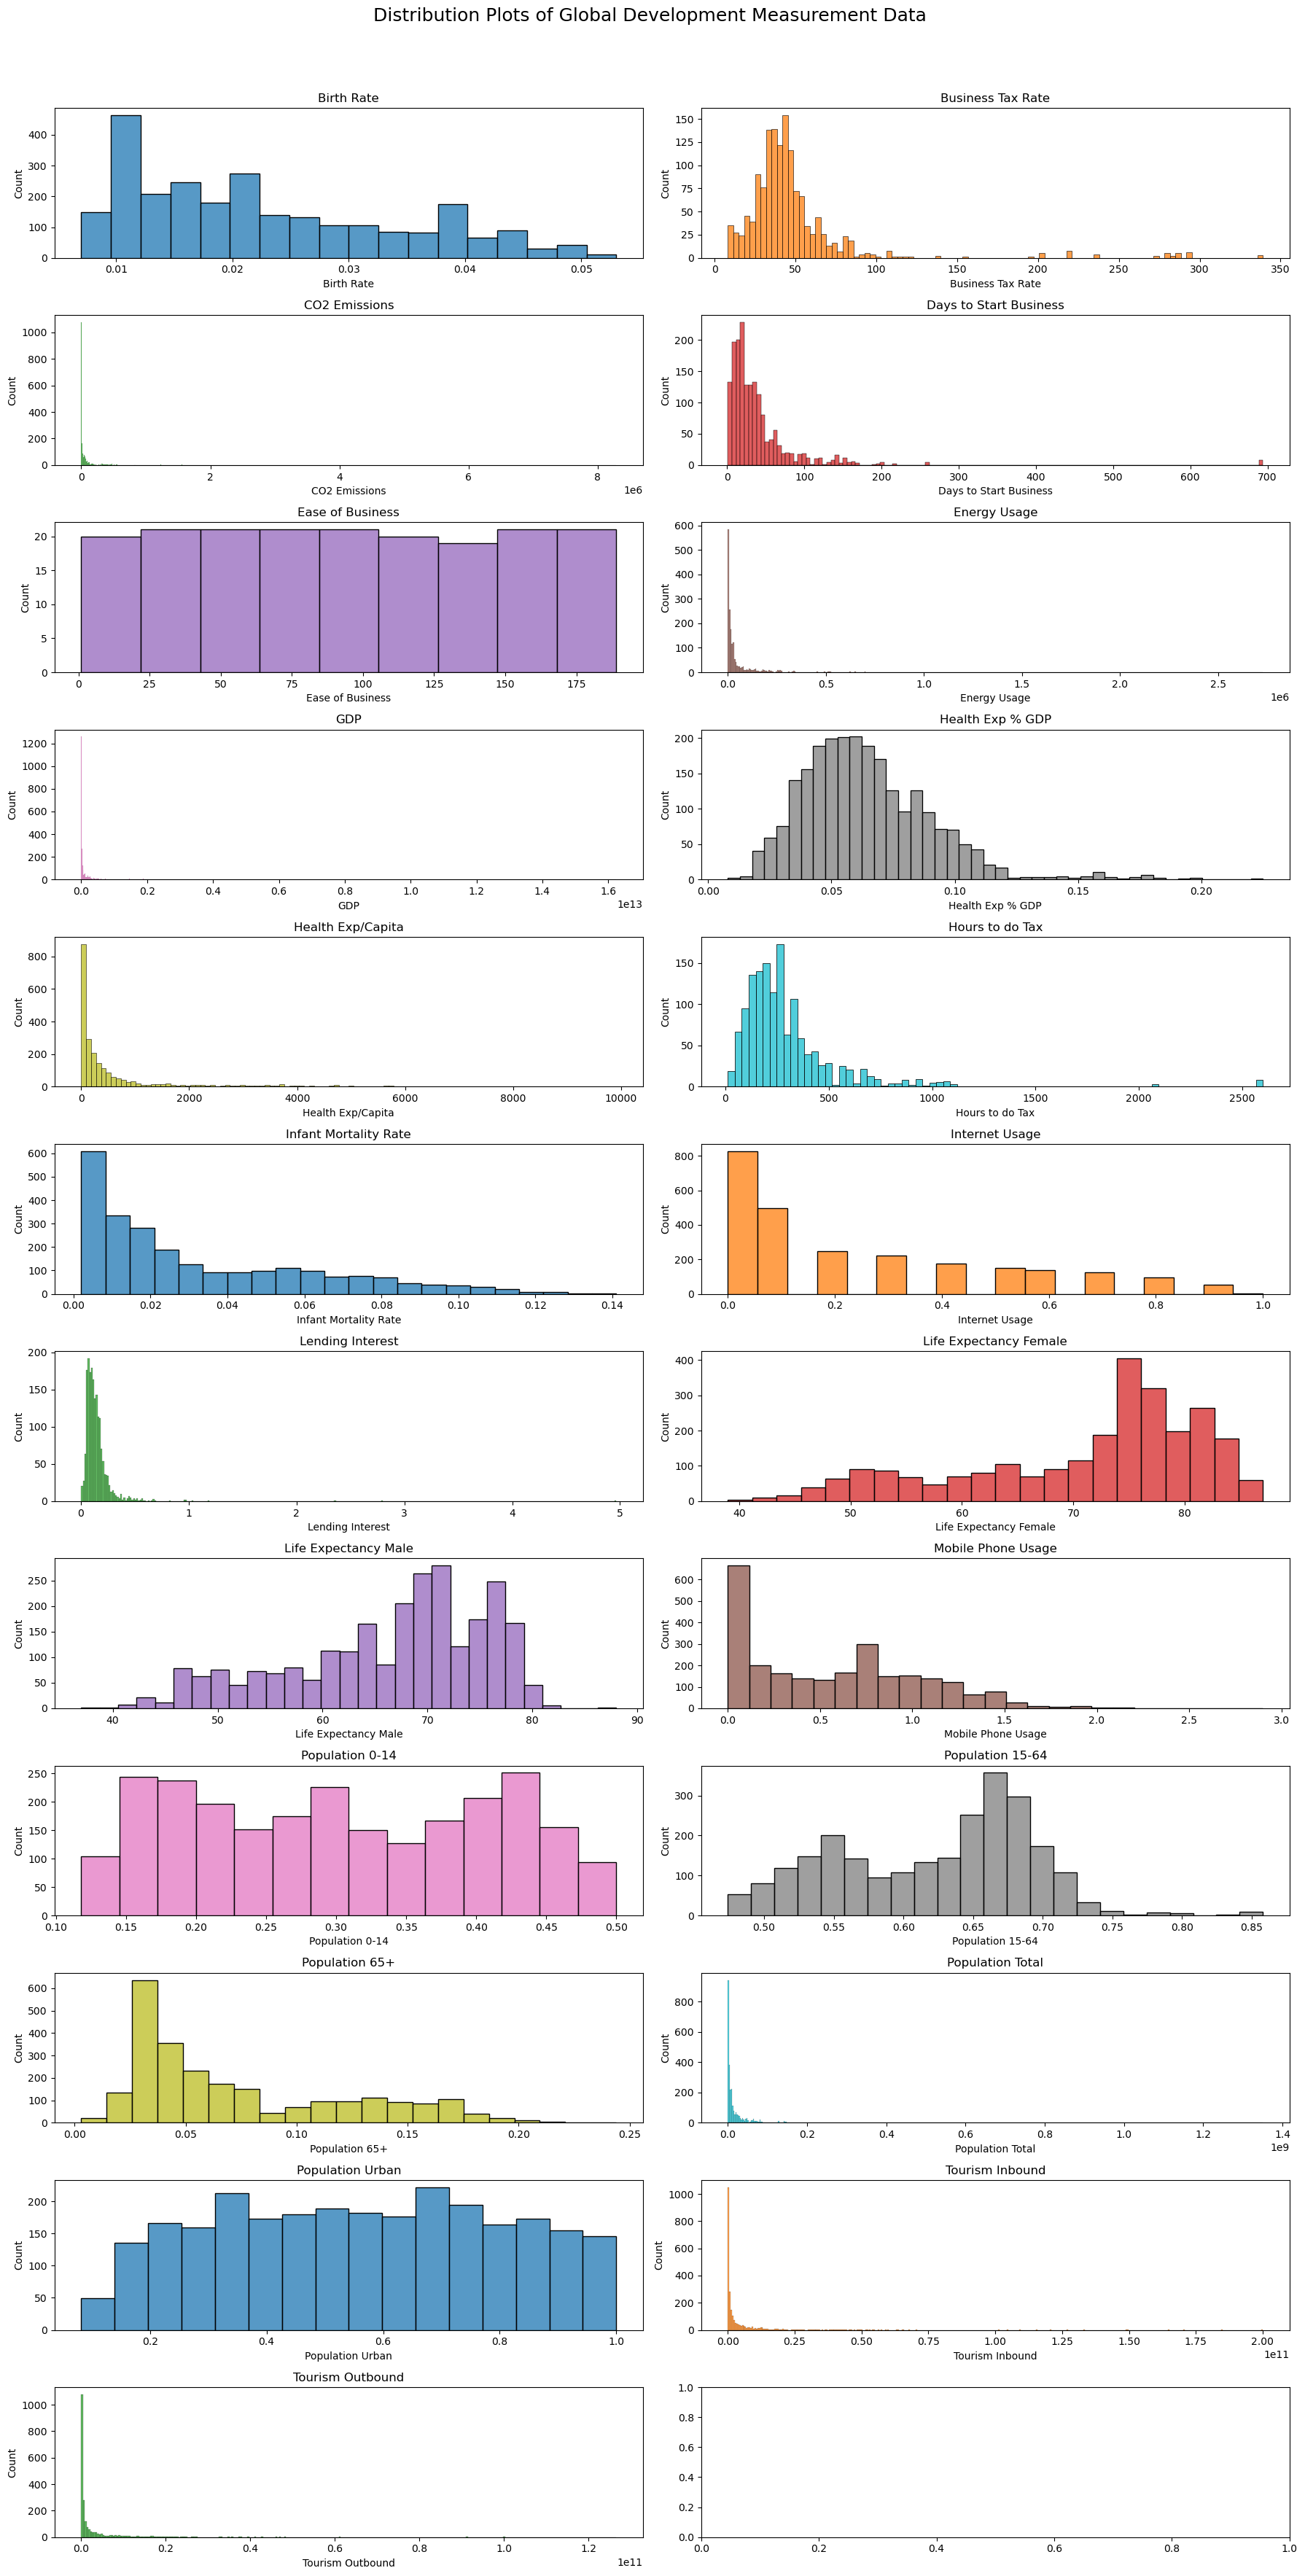

In [12]:
variables_to_plot = [
    'Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
    'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
    'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
    'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
    'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
    'Population 0-14', 'Population 15-64',
    'Population 65+', 'Population Total', 'Population Urban',
    'Tourism Inbound', 'Tourism Outbound']

# Setting up the subplots with 2 variables in a row
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(18, 3 * 12))

# Plot distplots for continuous variables using a for loop
for i, var in enumerate(variables_to_plot):
    row = i // 2
    col = i % 2
    sns.histplot(df[var], color='C{}'.format(i), ax=axes[row, col])
    axes[row, col].set_title(var)

# Adjust layout
fig.suptitle('Distribution Plots of Global Development Measurement Data \n', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the layout to prevent title overlap
plt.show()

From the above Distplot we can see some variables are Left Skewed, Right Skewed and some are platykurtic symmetrical distribution

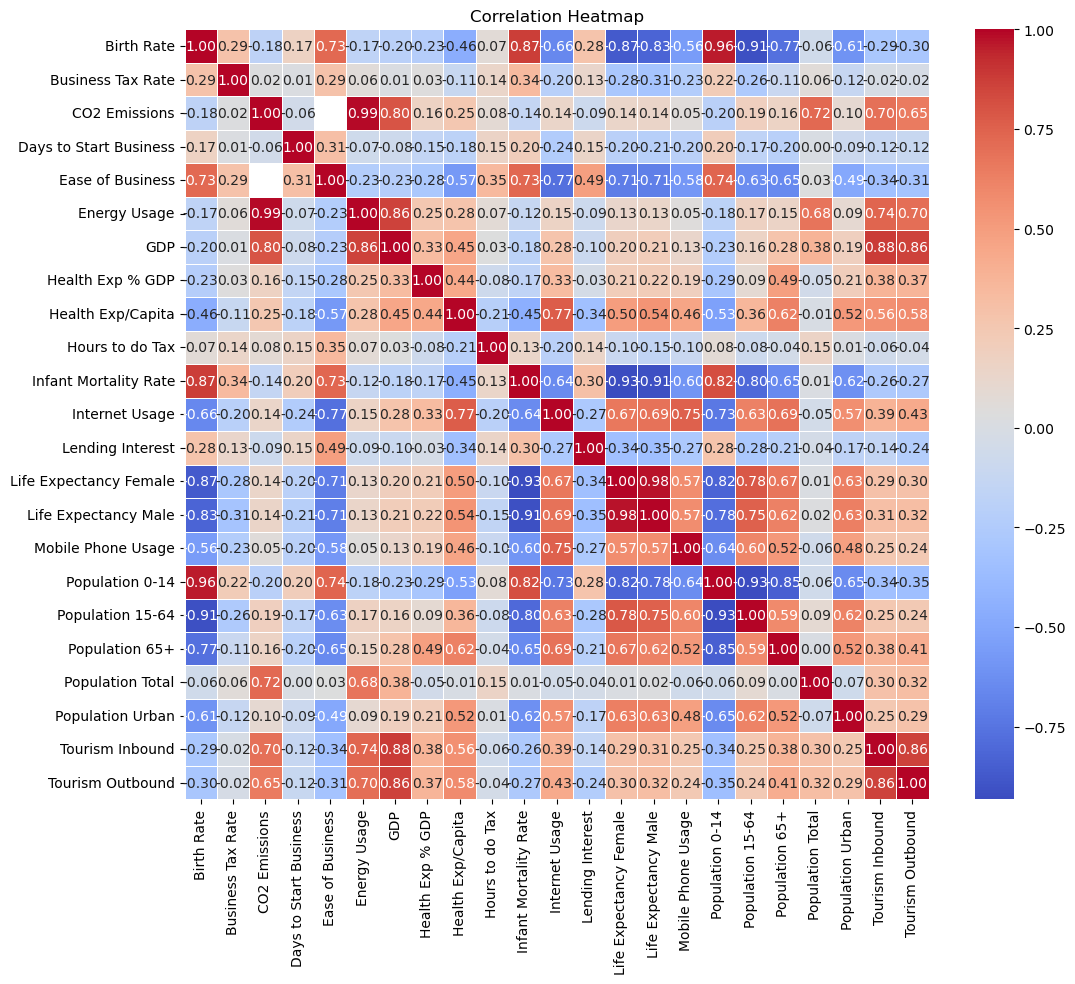

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

From the above Heatmap plotting some Scatterplopts.

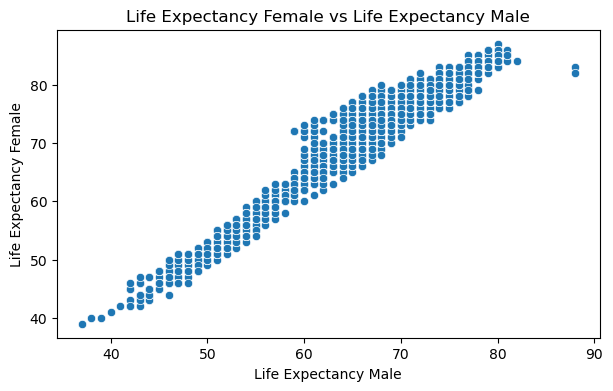

In [14]:
# Create a scatterplot for 'Life Expectancy Male' and 'Life Expectancy Female'
x_variable = 'Life Expectancy Male'
y_variable = 'Life Expectancy Female'
plt.figure(figsize=(7,4))
sns.scatterplot(x=x_variable, y=y_variable, data=df)
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'{y_variable} vs {x_variable}')

plt.show()

Positive linear relationship between Life Expectancy Male and Life Expectancy Female we can say that  Life Expectancy Male depends on Life Expectancy Female

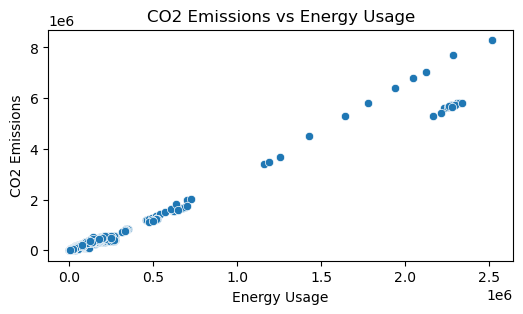

In [15]:
# Create a scatterplot for CO2 Emissions and Energy
x_variable = 'Energy Usage'
y_variable = 'CO2 Emissions'
plt.figure(figsize=(6, 3))
sns.scatterplot(x=x_variable, y=y_variable, data=df)
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'{y_variable} vs {x_variable}')

plt.show()

Positive linear relationship between Energy usage and CO2 Emissions we can say that CO2 Emissions depends on Energy usage

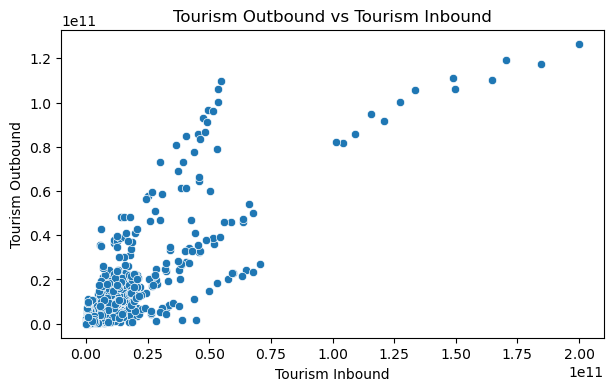

In [16]:
# Create a scatterplot for Tourism Inbound and Tourism Outbound
x_variable = 'Tourism Inbound'
y_variable = 'Tourism Outbound'
plt.figure(figsize=(7,4))
sns.scatterplot(x=x_variable, y=y_variable, data=df)
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'{y_variable} vs {x_variable}')

plt.show()

Linear relationship between Tourism inbound & Tourism outbound

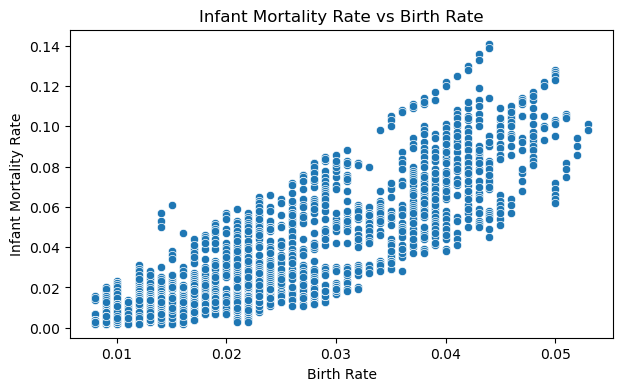

In [17]:
# Create a scatterplot for 'Birth Rate' and 'Infant Mortality Rate'
x_variable = 'Birth Rate'
y_variable = 'Infant Mortality Rate'
plt.figure(figsize=(7,4))
sns.scatterplot(x=x_variable, y=y_variable, data=df)
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'{y_variable} vs {x_variable}')

plt.show()

The data points are overlapping and not spreaded, it means that there is a strong positive linear relationship between Birth Rate and Infant Mortality Rate

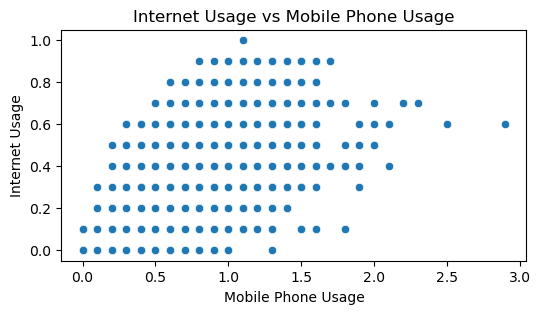

In [18]:
# Create a scatterplot for 'Mobile Phone Usage' and 'Infant Mortality Rate''Internet Usage'
x_variable = 'Mobile Phone Usage'
y_variable = 'Internet Usage'
plt.figure(figsize=(6,3))
sns.scatterplot(x=x_variable, y=y_variable, data=df)
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'{y_variable} vs {x_variable}')

plt.show()

In [19]:
df.corr(numeric_only=True)

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
Birth Rate,1.000000,0.288982,-0.175750,0.169013,0.727492,-0.169664,-0.195565,-0.227653,-0.463907,0.069324,...,-0.868174,-0.825745,-0.558411,0.955966,-0.912837,-0.773014,-0.057851,-0.606933,-0.287021,-0.296049
Business Tax Rate,0.288982,1.000000,0.022298,0.013339,0.287221,0.059210,0.005880,0.034727,-0.110941,0.138647,...,-0.284273,-0.312970,-0.233985,0.218907,-0.258508,-0.106498,0.058711,-0.123177,-0.017257,-0.021214
CO2 Emissions,-0.175750,0.022298,1.000000,-0.055666,NaN,0.988715,0.801876,0.163236,0.254039,0.081485,...,0.135219,0.141452,0.054400,-0.198328,0.190808,0.160403,0.721145,0.098051,0.696357,0.650080
Days to Start Business,0.169013,0.013339,-0.055666,1.000000,0.308789,-0.069418,-0.079282,-0.147686,-0.181849,0.148423,...,-0.197764,-0.213764,-0.199868,0.203978,-0.166224,-0.201973,0.001357,-0.092493,-0.122206,-0.117471
Ease of Business,0.727492,0.287221,NaN,0.308789,1.000000,-0.234867,-0.227305,-0.278061,-0.573508,0.346213,...,-0.709671,-0.706122,-0.582954,0.741035,-0.631452,-0.646456,0.029175,-0.493255,-0.339292,-0.314160
Energy Usage,-0.169664,0.059210,0.988715,-0.069418,-0.234867,1.000000,0.861041,0.253146,0.278551,0.074673,...,0.125224,0.132984,0.045198,-0.184007,0.171528,0.148971,0.677971,0.094218,0.742379,0.703488
GDP,-0.195565,0.005880,0.801876,-0.079282,-0.227305,0.861041,1.000000,0.329416,0.451492,0.030371,...,0.196762,0.207653,0.129847,-0.234099,0.161611,0.275494,0.379295,0.185874,0.879849,0.856945
Health Exp % GDP,-0.227653,0.034727,0.163236,-0.147686,-0.278061,0.253146,0.329416,1.000000,0.444986,-0.079755,...,0.208335,0.219441,0.187336,-0.292266,0.093604,0.489835,-0.054097,0.205994,0.379051,0.371141
Health Exp/Capita,-0.463907,-0.110941,0.254039,-0.181849,-0.573508,0.278551,0.451492,0.444986,1.000000,-0.213454,...,0.499595,0.540419,0.460803,-0.529232,0.362444,0.623775,-0.005934,0.520300,0.556093,0.579977
Hours to do Tax,0.069324,0.138647,0.081485,0.148423,0.346213,0.074673,0.030371,-0.079755,-0.213454,1.000000,...,-0.104772,-0.154317,-0.103461,0.075677,-0.084376,-0.043624,0.146920,0.010022,-0.058792,-0.040801


In [20]:
print("Total missing values/ Null Values :",df.isnull().sum().sum())

Total missing values/ Null Values : 11740


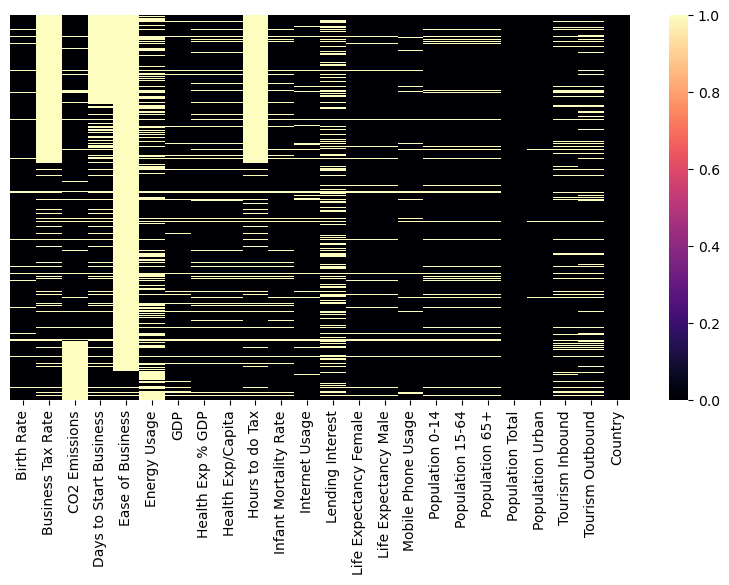

In [21]:
#visualizing the null values for each attribute(column)
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap="magma",yticklabels=False,cbar=True)
plt.show()

In [22]:
def display_null_percentage(df):
    null_percentage = []

    def calculate_and_print(column):
        percentage = df[column].isnull().sum() / len(df[column]) * 100
        percentage = round(percentage, 2)
        print(f"{column}: {percentage}%")
        if percentage > 0:
            null_percentage.append(column)

    for column in df.columns:
        calculate_and_print(column)

    return null_percentage

null_columns = display_null_percentage(df)

Birth Rate: 4.4%
Business Tax Rate: 47.37%
CO2 Emissions: 21.41%
Days to Start Business: 36.46%
Ease of Business: 93.16%
Energy Usage: 33.99%
GDP: 7.77%
Health Exp % GDP: 11.43%
Health Exp/Capita: 11.43%
Hours to do Tax: 47.63%
Infant Mortality Rate: 9.62%
Internet Usage: 6.4%
Lending Interest: 30.47%
Life Expectancy Female: 5.03%
Life Expectancy Male: 5.03%
Mobile Phone Usage: 6.18%
Population 0-14: 8.14%
Population 15-64: 8.14%
Population 65+: 8.14%
Population Total: 0.0%
Population Urban: 0.96%
Tourism Inbound: 13.61%
Tourism Outbound: 17.42%
Country: 0.0%


We have so many null values in 'Ease of Business','Hours to do Tax','Business Tax Rate','Days to Start Business','Lending Interest'

Dropping "Ease of Business: 93.16%","Hours to do Tax: 47.63%","Business Tax Rate: 47.37%","Days to Start Business: 36.46%","Lending Interest: 30.47%"

These features doesn't have good correlation with other features as we observed from above Correlaion Heatmap

In [23]:
columns_to_drop = ['Ease of Business','Hours to do Tax','Business Tax Rate','Days to Start Business','Lending Interest']
df=df.drop(columns_to_drop, axis=1)
df.columns

Index(['Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
       'Internet Usage', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound', 'Country'],
      dtype='object')

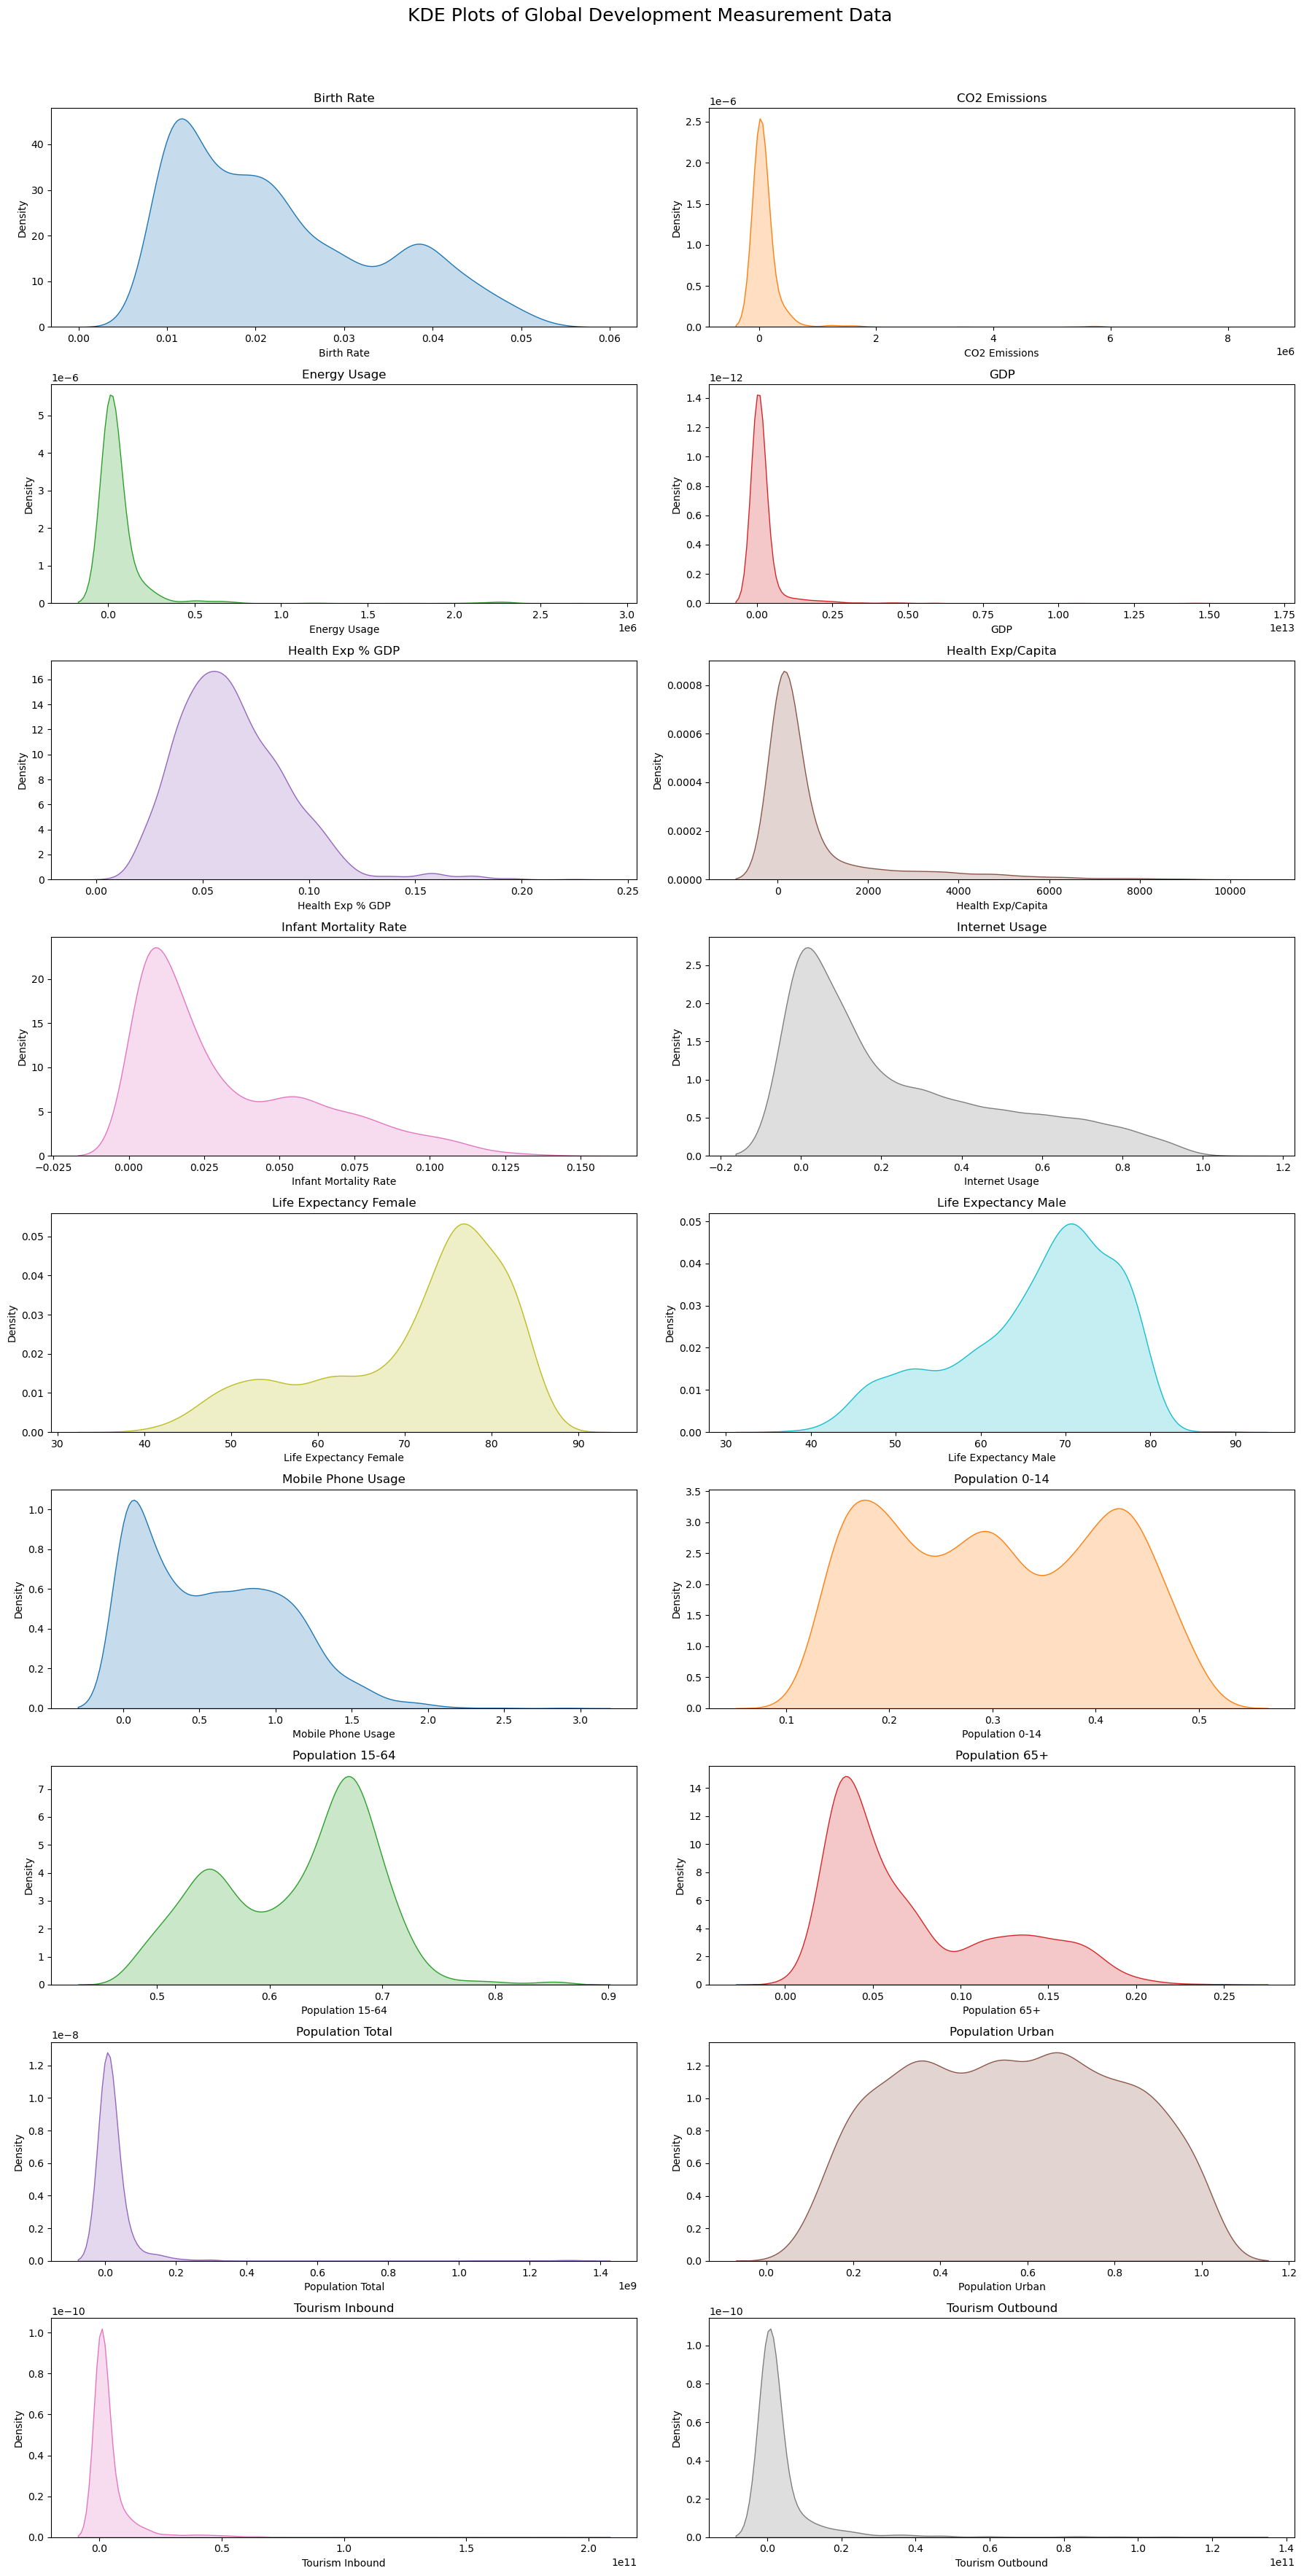

In [24]:
variable_to_plot = [
    'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
    'Health Exp % GDP', 'Health Exp/Capita',
    'Infant Mortality Rate', 'Internet Usage',
    'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
    'Population 0-14', 'Population 15-64',
    'Population 65+', 'Population Total', 'Population Urban',
    'Tourism Inbound', 'Tourism Outbound']
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(18, 3 * 12))
for i, var in enumerate(variable_to_plot):
    row = i // 2
    col = i % 2
    sns.kdeplot(df[var], color='C{}'.format(i), ax=axes[row, col], fill=True)
    axes[row, col].set_title(var)
fig.suptitle('KDE Plots of Global Development Measurement Data \n', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the layout to prevent title overlap
plt.show()

# Using KNN Imputer for missing values
KNN imputation is a non-parametric method that does not require any assumptions about
the underlying distribution of the data.
KNN imputation leverages the similarity between data points to estimate missing values, 
offering a versatile approach for handling missing data in both numerical and categorical features.

In [25]:
from sklearn.impute import KNNImputer

# Drop 'Country' column for imputation
df_impute = df.drop('Country', axis=1)

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)

# Impute missing values
imputed_data = knn_imputer.fit_transform(df_impute)

# Create a new DataFrame with imputed values
df_imputed = pd.DataFrame(imputed_data, columns=df_impute.columns)

In [26]:
print("total null values after KNN Imputer :",df_imputed.isnull().sum().sum())

total null values after KNN Imputer : 0


In [27]:
variables_to_boxplot = [
    'Birth Rate', 'CO2 Emissions', 'Energy Usage', 'GDP',
    'Health Exp % GDP', 'Health Exp/Capita',
    'Infant Mortality Rate', 'Internet Usage',
    'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
    'Population 0-14', 'Population 15-64',
    'Population 65+', 'Population Total', 'Population Urban',
    'Tourism Inbound', 'Tourism Outbound']

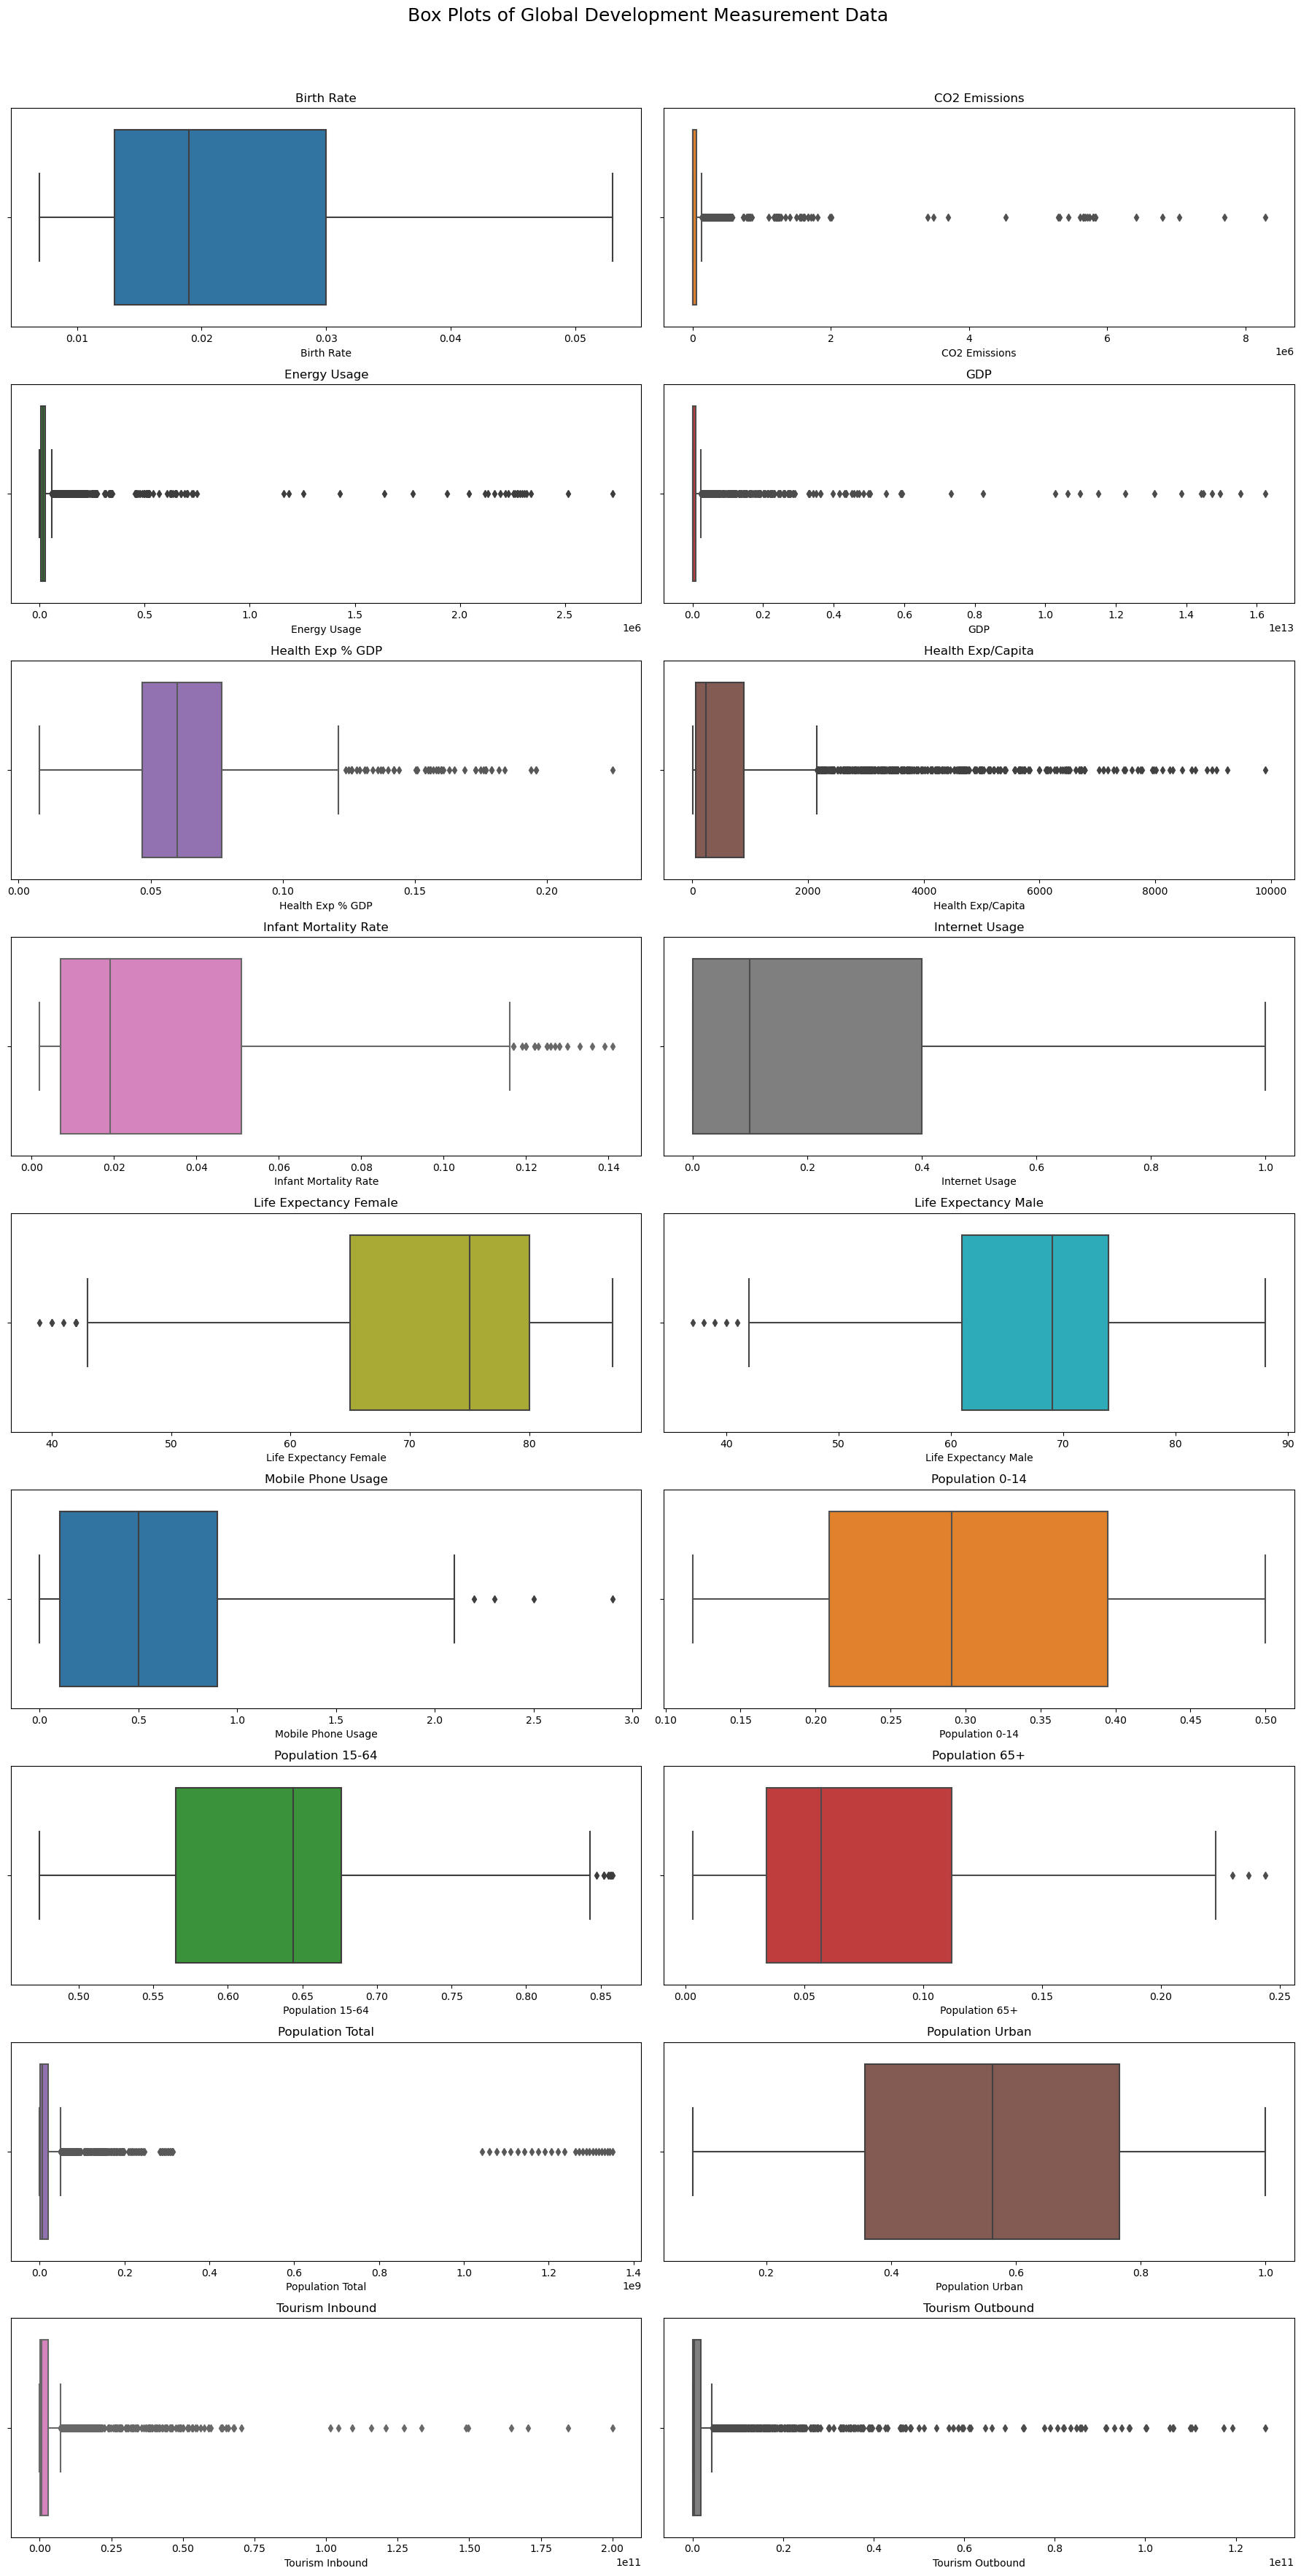

In [28]:
# Set up the subplots with 2 columns
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(18, 3 * 12))

# Plot boxplots for continuous variables using a for loop
for i, var in enumerate(variables_to_boxplot):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_imputed[var], ax=axes[row, col], color='C{}'.format(i))
    axes[row, col].set_title(var)

# Adjust layout
fig.suptitle('Box Plots of Global Development Measurement Data \n', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the layout to prevent title overlap
plt.show()

In [29]:
def replace_outliers(df):
    for column in df.columns:
        tenth_percentile = np.percentile(df[column], 10)
        ninetieth_percentile = np.percentile(df[column], 90)

        df[column] = np.where(df[column] < tenth_percentile, tenth_percentile, df[column])
        df[column] = np.where(df[column] > ninetieth_percentile, ninetieth_percentile, df[column])

    return df

# Calling the function to replace outliers
df_imputed_cap = replace_outliers(df_imputed)

df_imputed_cap.describe()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,2704.000000,2704.000000,2704.000000,2.704000e+03,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2.704000e+03,2704.000000,2.704000e+03,2.704000e+03
mean,0.021937,39292.362155,24918.540557,8.103360e+10,0.062481,802.823669,0.029673,0.240422,71.997535,67.192061,0.554795,0.298993,0.625052,0.073231,1.481298e+07,0.564035,2.457977e+09,1.902458e+09
std,0.010347,61054.148160,29863.868958,1.285414e+11,0.019311,1124.178753,0.026100,0.244008,9.551568,8.361229,0.419367,0.097696,0.059259,0.043909,1.941483e+07,0.228870,3.603137e+09,3.097381e+09
min,0.010000,250.200000,871.700000,7.793645e+08,0.036000,22.000000,0.004000,0.000000,54.000000,52.000000,0.000000,0.163300,0.528000,0.028000,1.023735e+05,0.223000,4.000000e+07,2.915000e+07
25%,0.013000,601.500000,3848.250000,2.905645e+09,0.046917,57.000000,0.007000,0.000000,65.000000,61.000000,0.100000,0.209000,0.565000,0.034000,8.783360e+05,0.357750,1.600000e+08,1.082500e+08
50%,0.019000,4980.000000,16205.666667,1.280218e+10,0.060000,229.500000,0.019000,0.100000,75.000000,69.000000,0.500000,0.291000,0.644000,0.057000,5.800324e+06,0.563000,5.935000e+08,3.185000e+08
75%,0.030000,53771.500000,24919.500000,9.708461e+10,0.077000,894.000000,0.051000,0.400000,80.000000,74.000000,0.900000,0.395000,0.676333,0.112000,2.014089e+07,0.766000,2.966833e+09,1.797500e+09
max,0.040000,189546.400000,99753.300000,3.937049e+11,0.096000,3315.200000,0.079000,0.700000,83.000000,77.666667,1.200000,0.442000,0.698000,0.152700,6.046076e+07,0.903000,1.114370e+10,9.523200e+09


# Plottig Boxplot after using Capping Method to replace Outliers

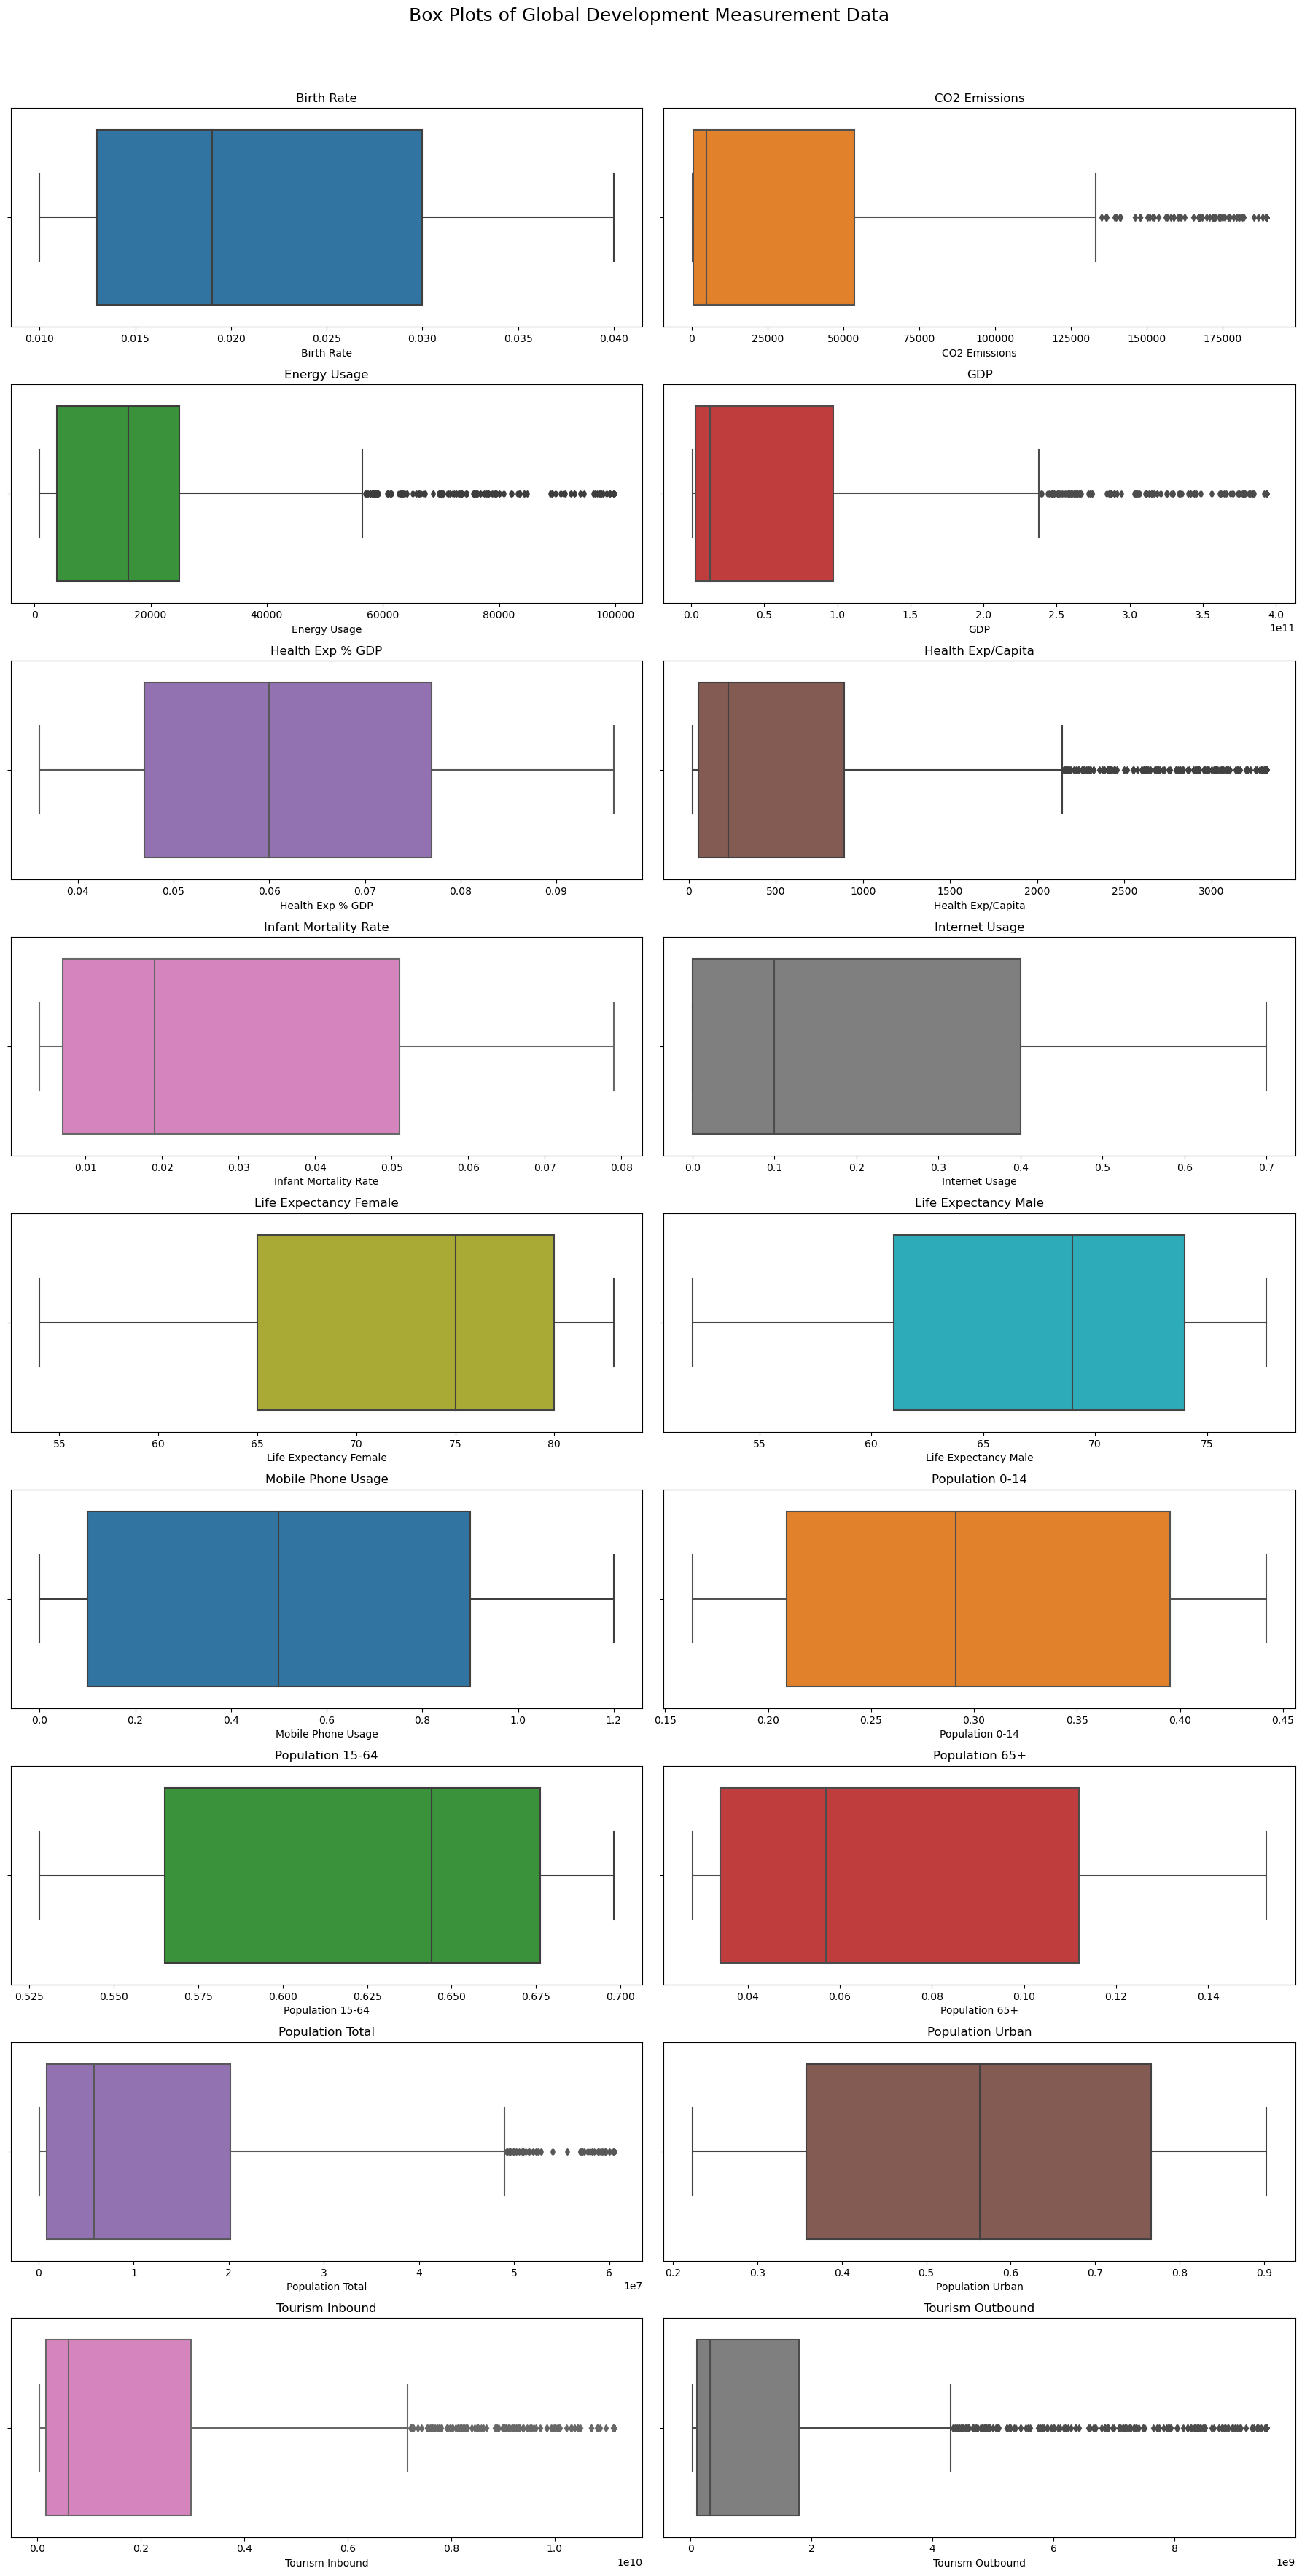

In [30]:
# Set up the subplots with 2 columns
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(18, 3 * 12))

# Plot boxplots for continuous variables using a for loop
for i, var in enumerate(variables_to_boxplot):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_imputed_cap[var], ax=axes[row, col], color='C{}'.format(i))
    axes[row, col].set_title(var)

# Adjust layout
fig.suptitle('Box Plots of Global Development Measurement Data \n', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the layout to prevent title overlap
plt.show()

In [31]:
# We can see so many outliers are present in the Data so we are using IQR method to replace outliers

In [32]:
def replace_outliers_iqr(df):
    for column in df.columns:
        # Calculate the first and third quartiles
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the bounds
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Calling the function to again replace outliers using IQR
df_imputed = replace_outliers_iqr(df_imputed)

df_imputed.describe()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,2704.000000,2704.000000,2704.000000,2.704000e+03,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,2.704000e+03,2704.000000,2.704000e+03,2.704000e+03
mean,0.021937,33057.240705,19824.797257,6.252139e+10,0.062481,639.476146,0.029673,0.240422,71.997535,67.192061,0.554795,0.298993,0.625052,0.073231,1.357533e+07,0.564035,1.987145e+09,1.225925e+09
std,0.010347,46641.957824,18345.273933,8.741191e+10,0.019311,789.065259,0.026100,0.244008,9.551568,8.361229,0.419367,0.097696,0.059259,0.043909,1.663729e+07,0.228870,2.562657e+09,1.614946e+09
min,0.010000,250.200000,871.700000,7.793645e+08,0.036000,22.000000,0.004000,0.000000,54.000000,52.000000,0.000000,0.163300,0.528000,0.028000,1.023735e+05,0.223000,4.000000e+07,2.915000e+07
25%,0.013000,601.500000,3848.250000,2.905645e+09,0.046917,57.000000,0.007000,0.000000,65.000000,61.000000,0.100000,0.209000,0.565000,0.034000,8.783360e+05,0.357750,1.600000e+08,1.082500e+08
50%,0.019000,4980.000000,16205.666667,1.280218e+10,0.060000,229.500000,0.019000,0.100000,75.000000,69.000000,0.500000,0.291000,0.644000,0.057000,5.800324e+06,0.563000,5.935000e+08,3.185000e+08
75%,0.030000,53771.500000,24919.500000,9.708461e+10,0.077000,894.000000,0.051000,0.400000,80.000000,74.000000,0.900000,0.395000,0.676333,0.112000,2.014089e+07,0.766000,2.966833e+09,1.797500e+09
max,0.040000,133526.500000,56526.375000,2.383531e+11,0.096000,2149.500000,0.079000,0.700000,83.000000,77.666667,1.200000,0.442000,0.698000,0.152700,4.903473e+07,0.903000,7.177083e+09,4.331375e+09


# Plotting Box Plot after handling Outliers

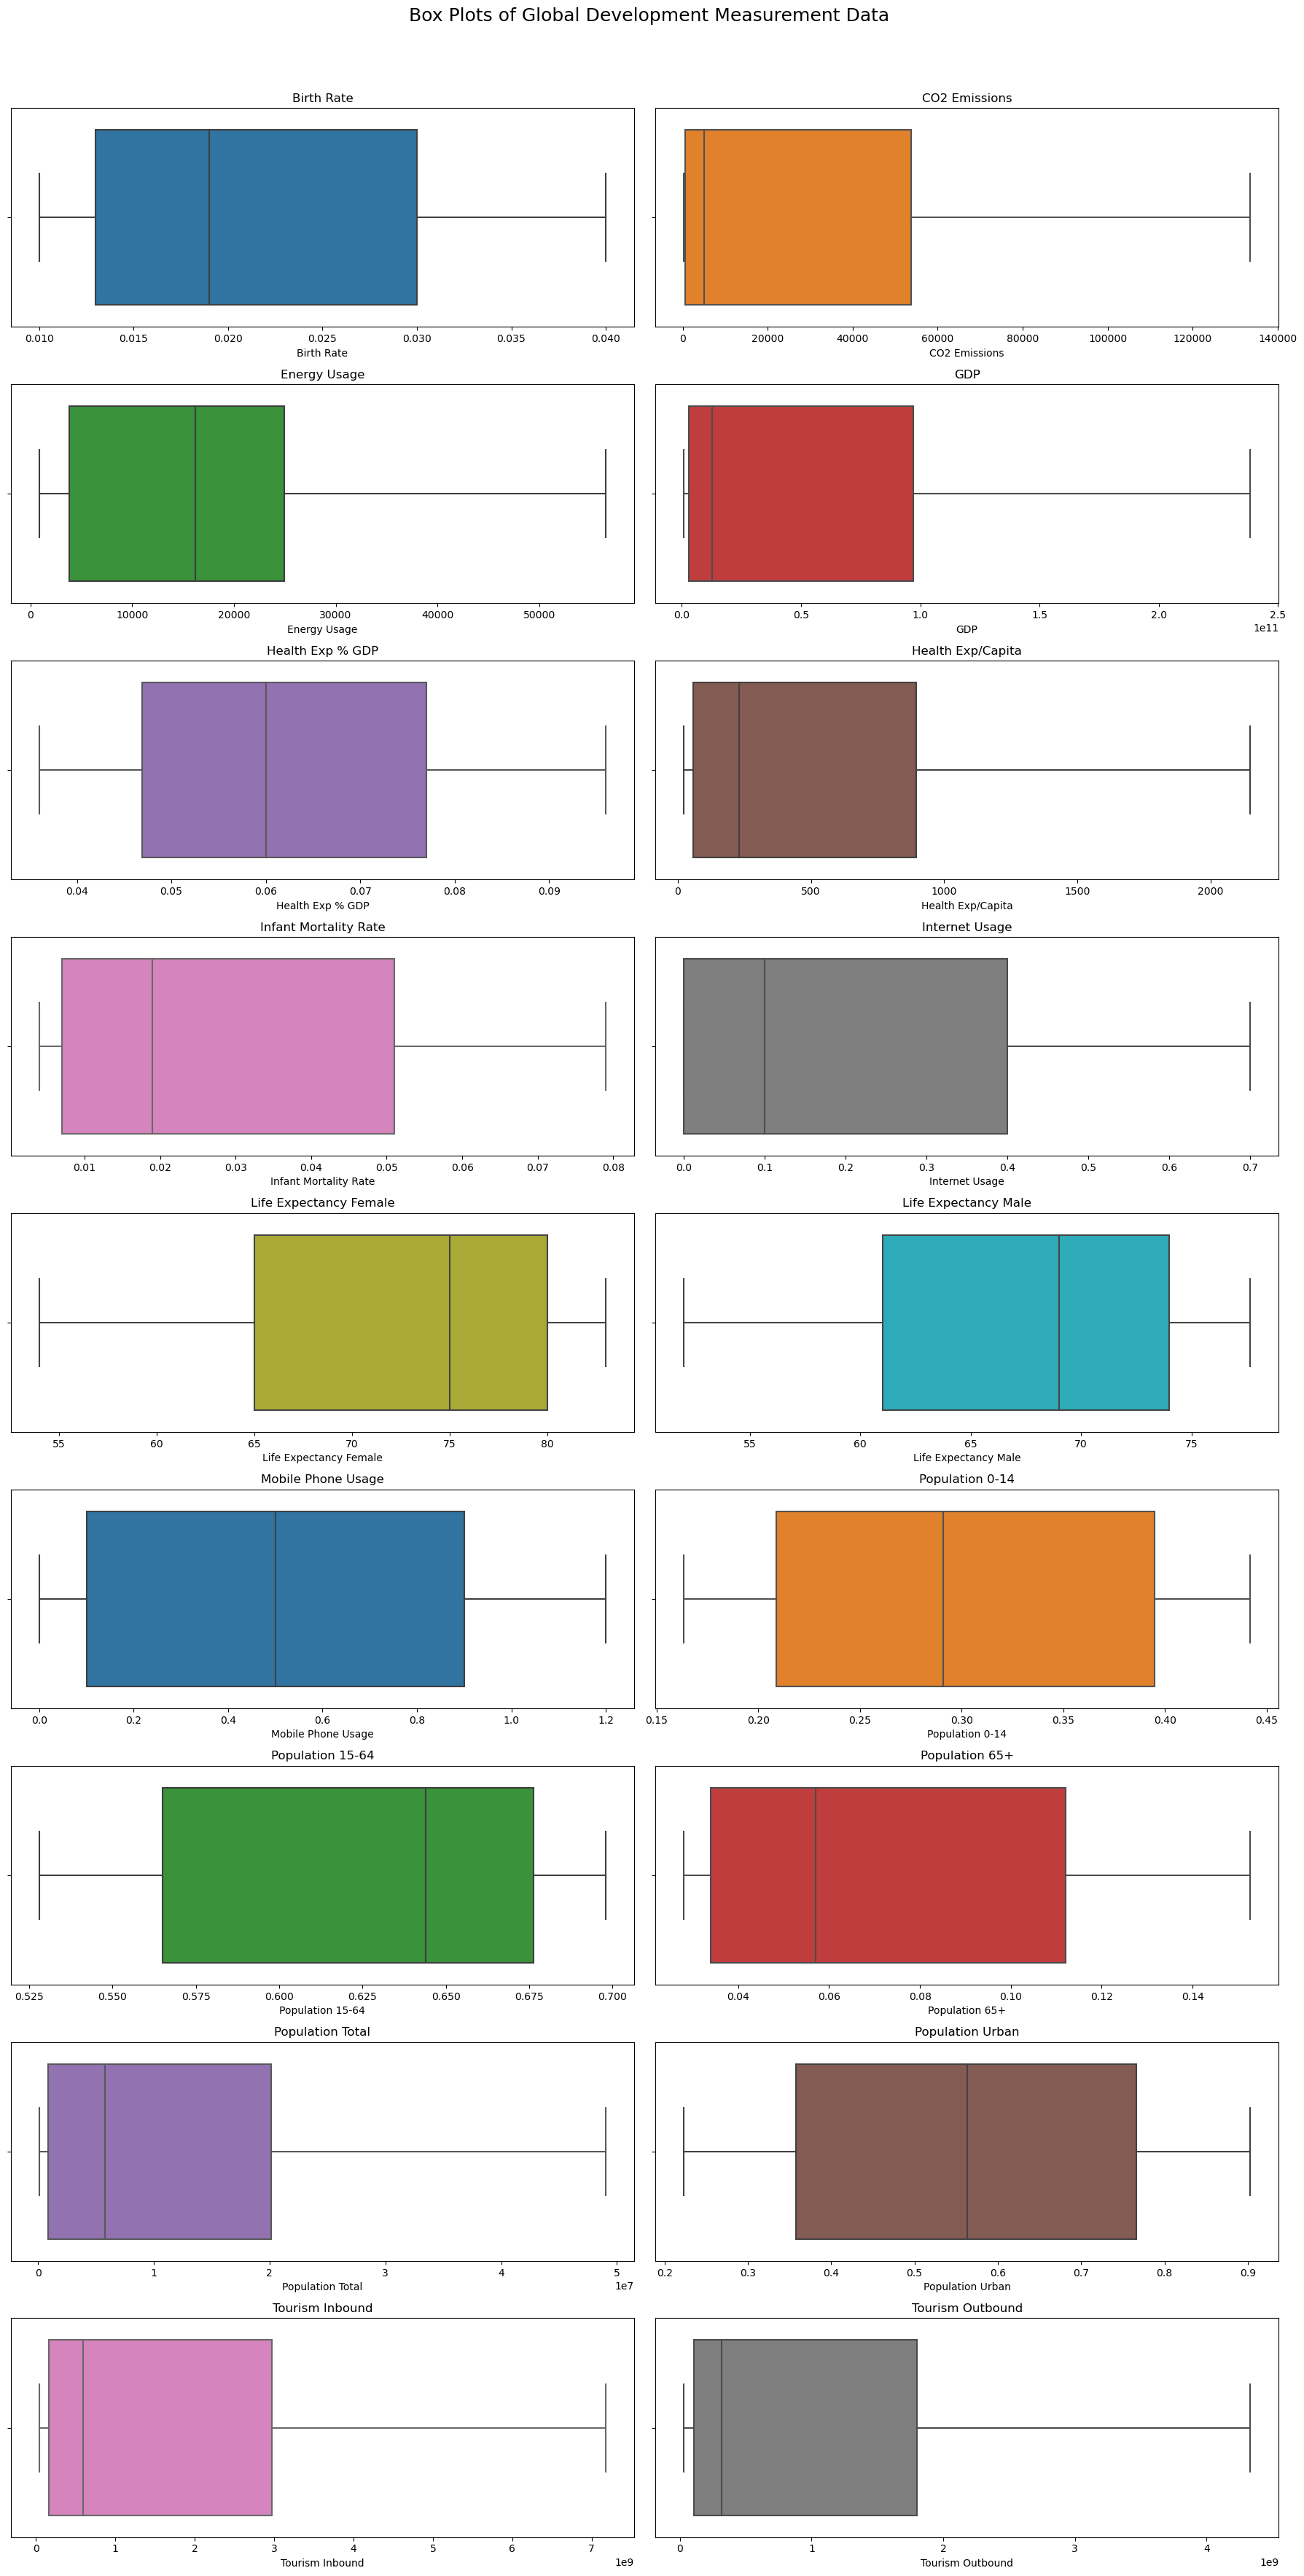

In [33]:
# Set up the subplots with 2 columns
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(18, 3 * 12))

# Plot boxplots for continuous variables using a for loop
for i, var in enumerate(variables_to_boxplot):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_imputed[var], ax=axes[row, col], color='C{}'.format(i))
    axes[row, col].set_title(var)

# Adjust layout
fig.suptitle('Box Plots of Global Development Measurement Data \n', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the layout to prevent title overlap
plt.show()

# Adding "Country" column to our updated "df_imputed" data without outliers

In [34]:
df_imputed['Country']=df['Country']

In [35]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2704 non-null   float64
 1   CO2 Emissions           2704 non-null   float64
 2   Energy Usage            2704 non-null   float64
 3   GDP                     2704 non-null   float64
 4   Health Exp % GDP        2704 non-null   float64
 5   Health Exp/Capita       2704 non-null   float64
 6   Infant Mortality Rate   2704 non-null   float64
 7   Internet Usage          2704 non-null   float64
 8   Life Expectancy Female  2704 non-null   float64
 9   Life Expectancy Male    2704 non-null   float64
 10  Mobile Phone Usage      2704 non-null   float64
 11  Population 0-14         2704 non-null   float64
 12  Population 15-64        2704 non-null   float64
 13  Population 65+          2704 non-null   float64
 14  Population Total        2704 non-null   

In [36]:
# Applying Label Encode for Country Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_imputed['Country_Encoded'] = le.fit_transform(df_imputed['Country'])
df_imputed['Country_Encoded']=df_imputed['Country_Encoded'].astype(float)
df_imputed.drop(['Country'],axis=1,inplace=True)

In [37]:
df_imputed

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_Encoded
0,0.020000,87931.000000,26998.000000,5.479006e+10,0.036,60.0,0.034,0.000000,71.000000,67.000000,0.000000,0.342,0.619000,0.039000,3.171945e+07,0.599,1.020000e+08,1.930000e+08,2.0
1,0.040000,9542.000000,7499.000000,9.129595e+09,0.036,22.0,0.079,0.000000,54.000000,52.000000,0.000000,0.442,0.528000,0.028000,1.392493e+07,0.324,4.000000e+07,1.460000e+08,5.0
2,0.040000,1617.000000,1983.000000,2.359122e+09,0.043,22.0,0.079,0.000000,57.000000,53.000000,0.000000,0.442,0.528000,0.029000,6.949366e+06,0.383,7.700000e+07,5.000000e+07,20.0
3,0.027000,4276.000000,1836.000000,5.788312e+09,0.047,152.0,0.054,0.000000,54.000000,52.000000,0.100000,0.383,0.587000,0.029000,1.755375e+06,0.532,2.270000e+08,2.090000e+08,25.0
4,0.040000,1041.000000,13489.333333,2.610959e+09,0.051,22.0,0.079,0.000000,54.000000,52.000000,0.000000,0.442,0.528000,0.028000,1.160794e+07,0.223,4.000000e+07,3.000000e+07,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.011667,250.200000,871.700000,2.741753e+09,0.036,2149.5,0.004,0.466667,82.666667,76.666667,0.433333,0.291,0.638667,0.070333,1.023735e+05,0.903,5.036667e+08,1.403333e+08,193.0
2700,0.013000,79142.666667,56526.375000,2.383531e+11,0.096,2149.5,0.006,0.700000,81.000000,76.000000,1.000000,0.196,0.667000,0.136000,4.903473e+07,0.811,7.177083e+09,4.331375e+09,198.0
2701,0.015000,590.333333,22263.000000,5.000435e+10,0.089,1308.0,0.010,0.500000,80.000000,74.000000,1.200000,0.220,0.639000,0.140000,3.395253e+06,0.903,2.222000e+09,1.028000e+09,199.0
2702,0.020000,79142.666667,21639.000000,2.383531e+11,0.046,593.0,0.013,0.500000,78.000000,72.000000,1.000000,0.288,0.652000,0.060000,2.995478e+07,0.889,9.040000e+08,3.202000e+09,202.0


In [38]:
#Scaling the data using MinMaxScaler Sacler

df_scale=df_imputed.iloc[:,:-1] # Removed Country_Encoded column
df_scale

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_scale)

data_scaled=pd.DataFrame(data_scaled, columns=df_scale.columns)
data_scaled.head()

,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.333333,0.657887,0.469436,0.227343,0.000000,0.017861,0.400000,0.0,0.586207,0.584416,0.000000,0.641191,0.535294,0.088212,0.646138,0.552941,0.008687,0.038085
1,1.000000,0.069718,0.119079,0.035148,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.282483,0.148529,0.000000,0.027160
2,1.000000,0.010255,0.019968,0.006650,0.116667,0.000000,1.000000,0.0,0.103448,0.038961,0.000000,1.000000,0.000000,0.008019,0.139928,0.235294,0.005184,0.004846
3,0.566667,0.030206,0.017326,0.021084,0.183333,0.061105,0.666667,0.0,0.000000,0.000000,0.083333,0.788303,0.347059,0.008019,0.033781,0.454412,0.026201,0.041804
4,1.000000,0.005934,0.226713,0.007710,0.250000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.235132,0.000000,0.000000,0.000198


In [39]:
# Adding Country Column
data_scaled['Country']=df_imputed['Country_Encoded']
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2704 non-null   float64
 1   CO2 Emissions           2704 non-null   float64
 2   Energy Usage            2704 non-null   float64
 3   GDP                     2704 non-null   float64
 4   Health Exp % GDP        2704 non-null   float64
 5   Health Exp/Capita       2704 non-null   float64
 6   Infant Mortality Rate   2704 non-null   float64
 7   Internet Usage          2704 non-null   float64
 8   Life Expectancy Female  2704 non-null   float64
 9   Life Expectancy Male    2704 non-null   float64
 10  Mobile Phone Usage      2704 non-null   float64
 11  Population 0-14         2704 non-null   float64
 12  Population 15-64        2704 non-null   float64
 13  Population 65+          2704 non-null   float64
 14  Population Total        2704 non-null   

# PCA for Dimensionality Reduction:
Main objective is to capture the most of the information, reducing the dimensions without loosing much of the information


It removes multicollinearity issues
It will extracts the most important features from a dataset to reduce the complexity of a model

In [40]:
from sklearn.decomposition import PCA
df_pca=data_scaled.drop('Country', axis=1)

# Instantiate PCA object with maximum number of components
pca = PCA()

# Fit the PCA model on the standardized data
pca.fit(df_pca)

pca_components = pca.fit_transform(df_pca)

In [41]:
print("The amount of variance that each PCA explains is \n",pca.explained_variance_)
print("In percentage - The amount of variance that each PCA explains is \n",pca.explained_variance_ratio_)

The amount of variance that each PCA explains is 
 [1.14800810e+00 4.36188902e-01 1.45589020e-01 9.53895279e-02
 7.03114301e-02 5.14013545e-02 4.81381056e-02 4.50585297e-02
 2.84849771e-02 2.35705235e-02 1.89011867e-02 1.68775938e-02
 1.55138111e-02 1.27619784e-02 7.69057645e-03 6.62525336e-03
 1.83464508e-03 7.12970916e-04]
In percentage - The amount of variance that each PCA explains is 
 [5.28291394e-01 2.00725800e-01 6.69972857e-02 4.38964384e-02
 3.23559769e-02 2.36539214e-02 2.21522366e-02 2.07350746e-02
 1.31082423e-02 1.08467046e-02 8.69796504e-03 7.76674623e-03
 7.13915950e-03 5.87281864e-03 3.53905636e-03 3.04881503e-03
 8.44268617e-04 3.28095595e-04]


In [42]:
# Cumulative variance
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var1

array([52.83, 72.9 , 79.6 , 83.99, 87.23, 89.6 , 91.82, 93.89, 95.2 ,
       96.28, 97.15, 97.93, 98.64, 99.23, 99.58, 99.88, 99.96, 99.99])

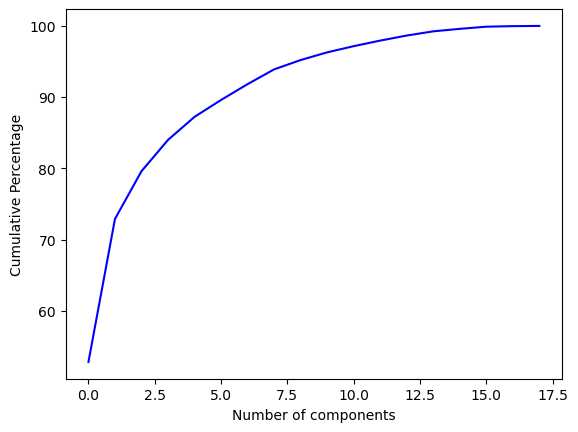

In [62]:
# Variance plot for PCA components obtained
plt.plot(var1,color='blue')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Percentage')
plt.show()

Key Insights from above Plot:
4 giving 84% variance of the data

In [67]:
data_pca = pca_components[:,:4]

# KMEANS

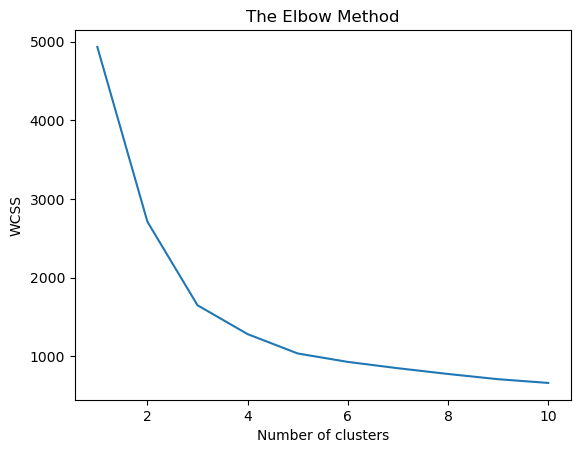

In [68]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Key Insights from the Above Plot:
We can observe that the most of the variance is covered with 4 clusters
There is not much variance in the plot after 4rth cluster, the line almost flattened through the all remaining clusters

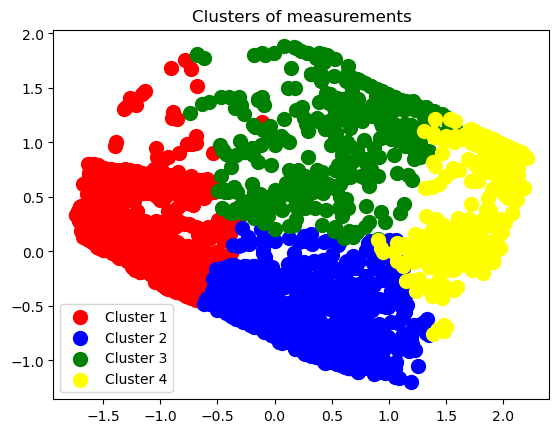

In [69]:
## creating clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca)
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_kmeans == 3, 0], data_pca[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [70]:
## Accuracy check
from sklearn.metrics import silhouette_score
s1_kmeans = silhouette_score(data_pca, y_kmeans)
print('Silhouette Score for K-means clustring :', s1_kmeans)

Silhouette Score for K-means clustring : 0.4532436943422508


# Hierarchical Clustering

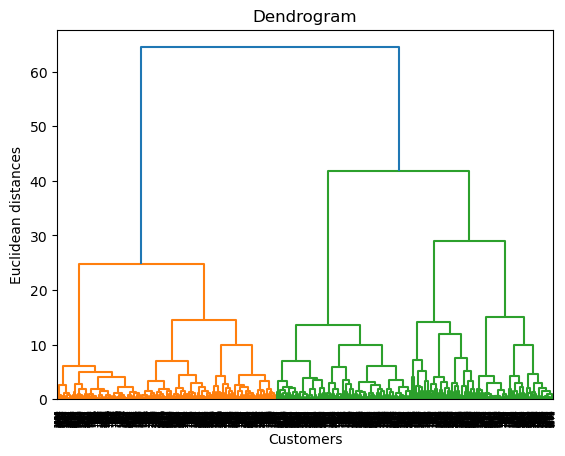

In [48]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [49]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca)

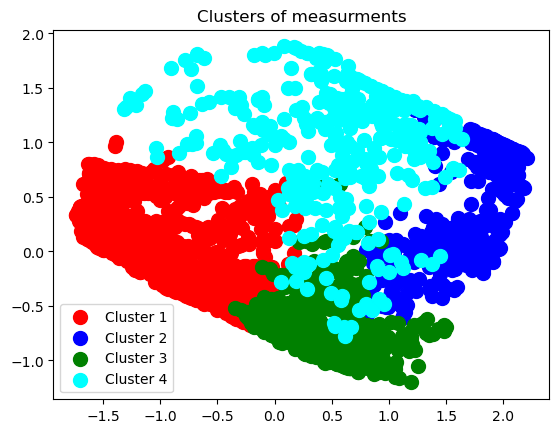

In [50]:
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [51]:
## Accuracy check
s1_hierarchy = silhouette_score(data_pca,y_hc)
print('Silhouette Score for Hierarchy clustring :',s1_hierarchy)

Silhouette Score for Hierarchy clustring : 0.3812918798600427


# DBSCAN

In [52]:
from sklearn.cluster import DBSCAN

eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the data to obtain clustering labels
dbscan_labels = dbscan.fit_predict(data_pca)

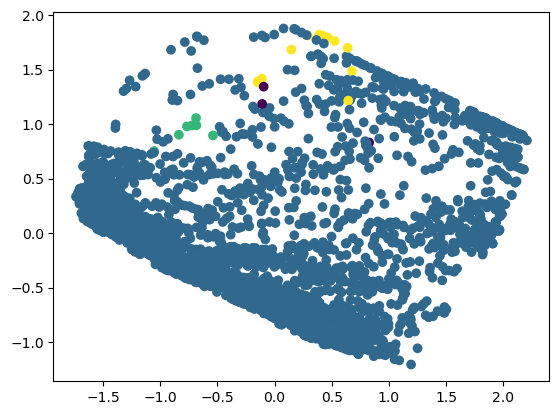

In [53]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels)
plt.show()

In [54]:
s1_dbscan = silhouette_score(data_pca, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s1_dbscan)

Silhouette Score for DBSCAN is: 0.06277735774073064


# T-SNE

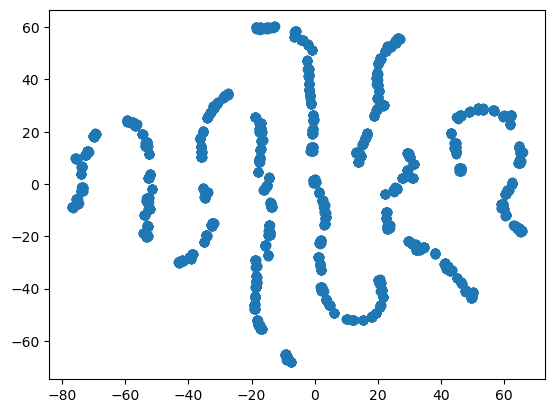

In [55]:
from sklearn.manifold import TSNE

# Initialize t-SNE with default parameters
tsne = TSNE()

# Fit and transform the data to 2 dimensions
data_tsne = tsne.fit_transform(data_scaled)

# Plot the results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.show()

# KMEANS

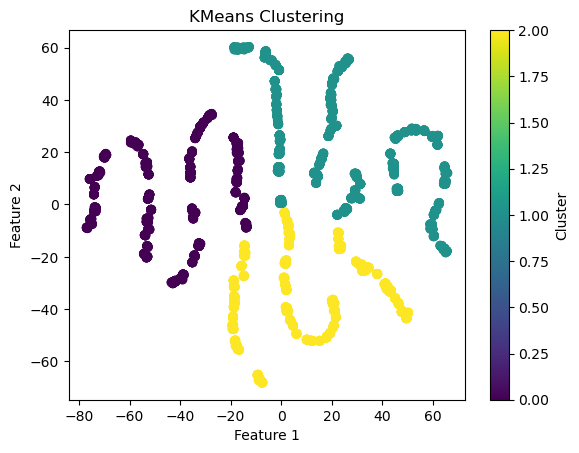

In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming data_tsne is your data that has been transformed using t-SNE

# Perform clustering with KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_tsne)

# Plot the clusters
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_kmeans, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [57]:
## Accuracy check
s2_kmeans = silhouette_score(data_tsne, y_kmeans)
print('Silhouette Score for K-means clustring :', s2_kmeans)

Silhouette Score for K-means clustring : 0.40860933


# Hierarchical Clustering

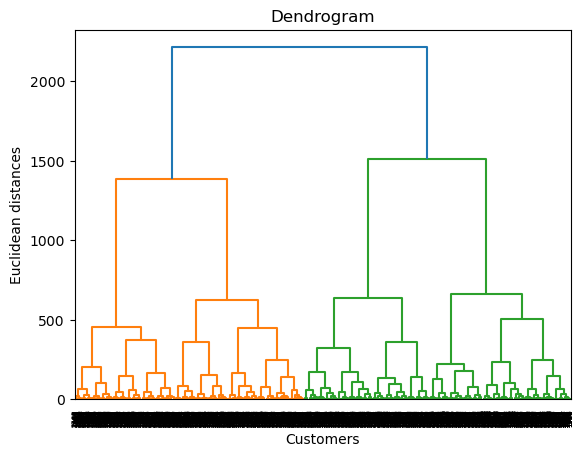

In [58]:
dendrogram = sch.dendrogram(sch.linkage(data_tsne, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

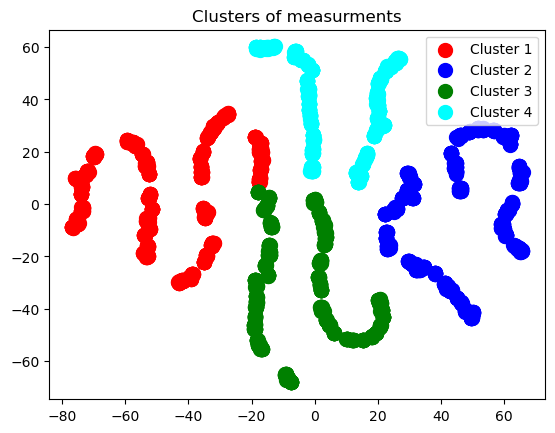

In [59]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_tsne)
plt.scatter(data_tsne[y_hc == 0, 0], data_tsne[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_hc == 1, 0], data_tsne[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_tsne[y_hc == 2, 0], data_tsne[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_tsne[y_hc == 3, 0], data_tsne[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [60]:
## Accuracy check
s2_hierarchy = silhouette_score(data_tsne,y_hc)
print('Silhouette Score for Hierarchy clustring :',s2_hierarchy)

Silhouette Score for Hierarchy clustring : 0.40823978


# Comparing 'Silhouette Score' for each model

In [61]:
df = pd.DataFrame({'Model':['M1 kmeans','M1 hierarchy','M1 DBSCAN','M2 kmeans','M2 hierarchy'],
                   'Silhouette Score':[s1_kmeans,s1_hierarchy,s1_dbscan,s2_kmeans,s2_hierarchy]})
df

,Model,Silhouette Score
0,M1 kmeans,0.453244
1,M1 hierarchy,0.381292
2,M1 DBSCAN,0.062777
3,M2 kmeans,0.408609
4,M2 hierarchy,0.408240


# Conclusion

By comparing 'Silhouette Score' for each model we get most higest silhoutte score is 0.453 for KMEANS

This algorithm give us the best clusters compare to other clustring algorithms.